In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import StrMethodFormatter
from datetime import datetime, timezone

In [99]:
# save data in a DataFrame
data = pd.read_csv('/content/clean_secular_talk_data.csv')

In [100]:
# delete videos with more like than views
data = data[~data["videoId"].isin(["tbLgrRbMoOI", "igi3mSl6t64"])]

# clean date column
data['publishedAt'] = pd.to_datetime(data['publishedAt'])

# filter counts
attributes = [
    "publishedAt",
    "viewCount",
    "likeCount",
    "commentCount",
]

data = data[attributes]

# filter data from 1/1/2020 to 12/31/2025
data = data[data["publishedAt"].between("2020-01-01", "2025-12-31 23:59:59")]

In [101]:
# group data by month-year
monthly_data = data.groupby(data["publishedAt"].dt.to_period("M")).agg({
    "viewCount": "sum",
    "likeCount": "sum",
    "commentCount": "sum"
    })

# turn index to time stamp
monthly_data.index = monthly_data.index.to_timestamp()

/tmp/ipython-input-3688307037.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_data = data.groupby(data["publishedAt"].dt.to_period("M")).agg({


In [102]:
# explore data structure
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2020-01-01 to 2025-12-01
Freq: MS
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   viewCount     72 non-null     int64  
 1   likeCount     72 non-null     int64  
 2   commentCount  72 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.2 KB


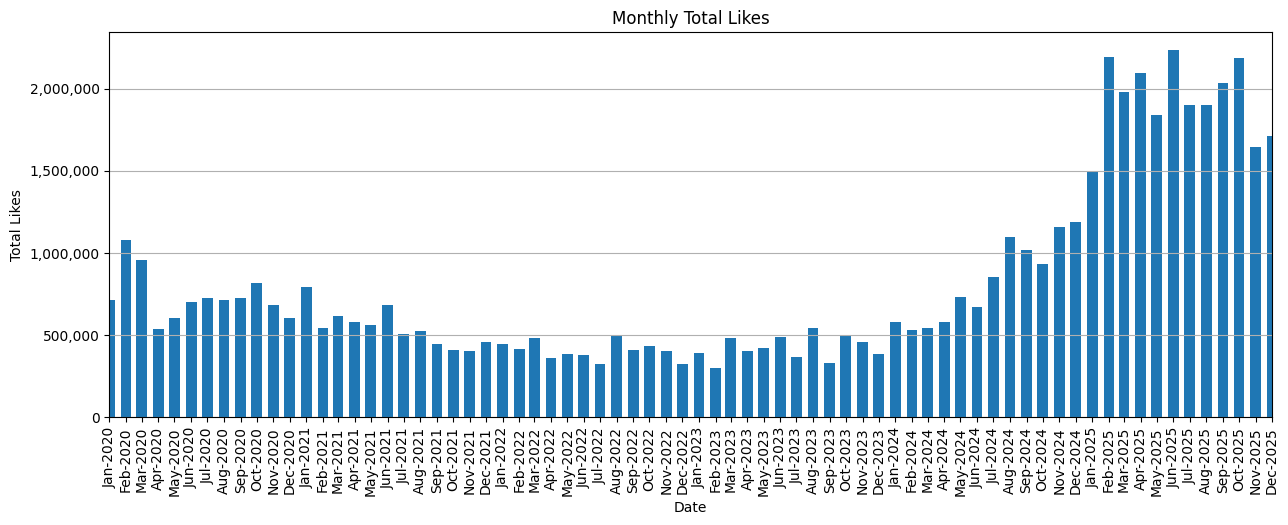

In [103]:
# bar graph: likes
plt.figure(figsize=(15, 5))
plt.bar(monthly_data.index, monthly_data["likeCount"], width=20)
plt.title("Monthly Total Likes")
plt.xlabel("Date")
plt.ylabel("Total Likes")
plt.grid(axis="y", alpha=1)
plt.xticks(rotation=90)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_xlim(monthly_data.index.min(), monthly_data.index.max())

plt.show()

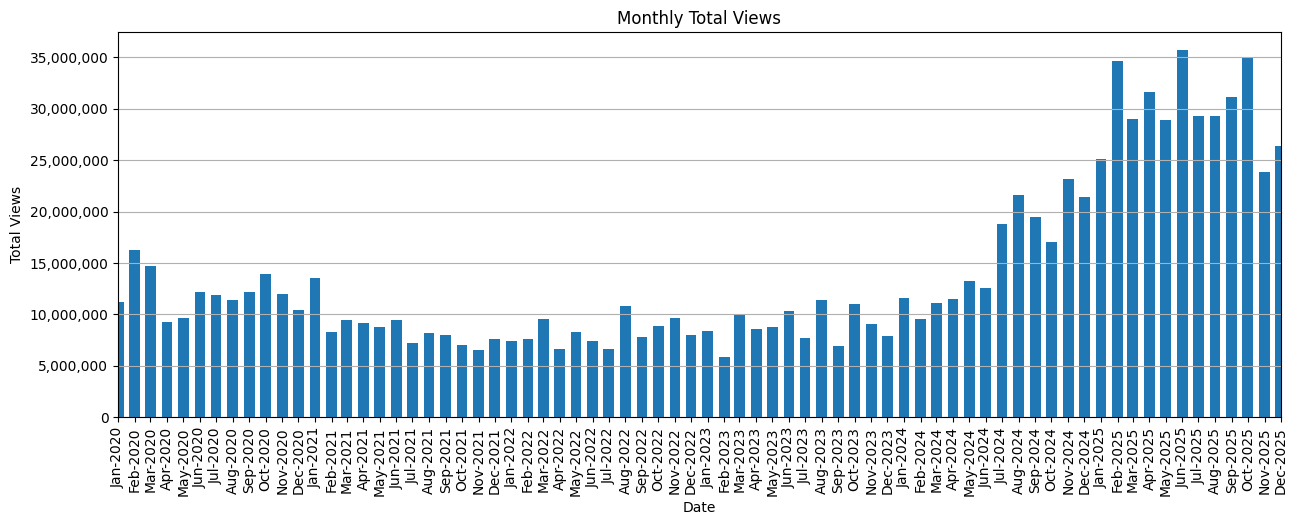

In [104]:
# bar graph: views
plt.figure(figsize=(15, 5))
plt.bar(monthly_data.index, monthly_data["viewCount"], width=20)
plt.title("Monthly Total Views")
plt.xlabel("Date")
plt.ylabel("Total Views")
plt.grid(axis="y", alpha=1)
plt.xticks(rotation=90)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_xlim(monthly_data.index.min(), monthly_data.index.max())

plt.show()

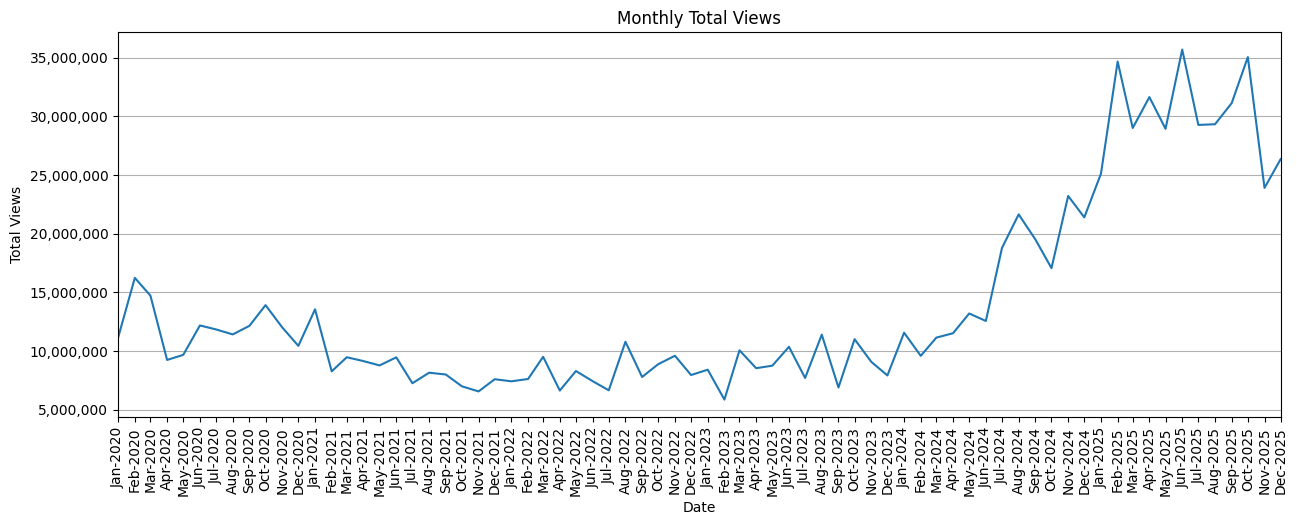

In [105]:
# line graph: views
plt.figure(figsize=(15, 5))
plt.plot(monthly_data.index, monthly_data["viewCount"])
plt.title("Monthly Total Views")
plt.xlabel("Date")
plt.ylabel("Total Views")
plt.grid(axis="y", alpha=1)
plt.xticks(rotation=90)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_xlim(monthly_data.index.min(), monthly_data.index.max())

plt.show()

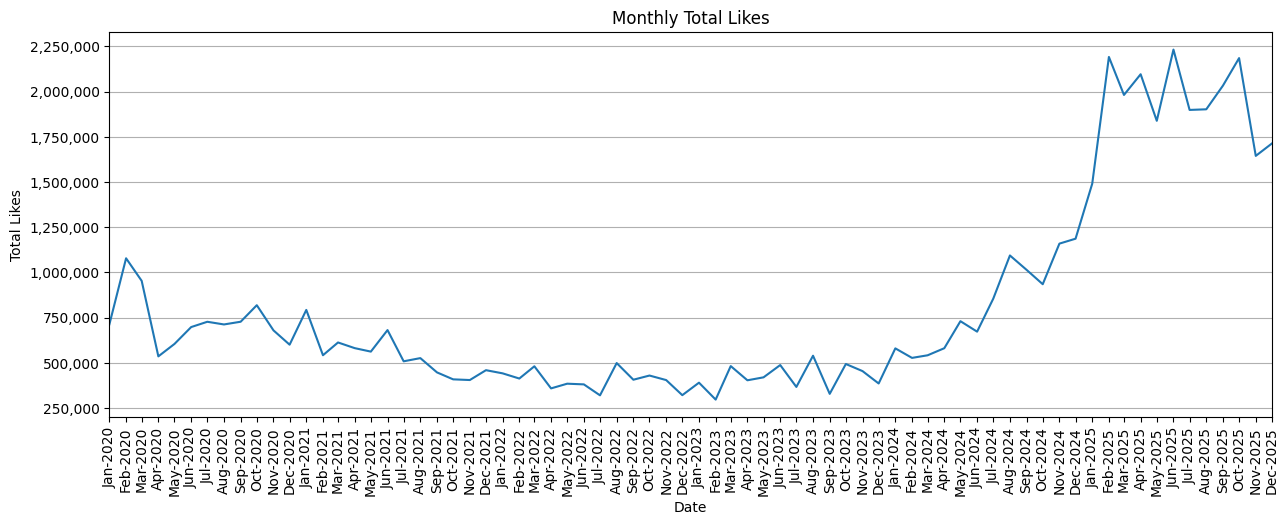

In [106]:
# line graph: liks
plt.figure(figsize=(15, 5))
plt.plot(monthly_data.index, monthly_data["likeCount"])
plt.title("Monthly Total Likes")
plt.xlabel("Date")
plt.ylabel("Total Likes")
plt.grid(axis="y", alpha=1)
plt.xticks(rotation=90)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_xlim(monthly_data.index.min(), monthly_data.index.max())

plt.show()

In [107]:
# build tidy frame
monthly_tidy = monthly_data[["likeCount"]].assign(
    year=monthly_data.index.year,
    month=monthly_data.index.month
)

# pivot: months as rows, years as columns
monthly_pivot = (monthly_data["likeCount"]
                 .to_frame()
                 .assign(
                     year=monthly_data.index.year,
                     month=monthly_data.index.month
                     )
                 .pivot_table(
                     index="month",
                     columns="year",
                     values="likeCount",
                     aggfunc="sum"
                     )
                 .sort_index()
                 )

# fix x axis
monthly_pivot.index = monthly_pivot.index.map(
    lambda m: pd.to_datetime(str(m), format="%m").strftime("%b")
)

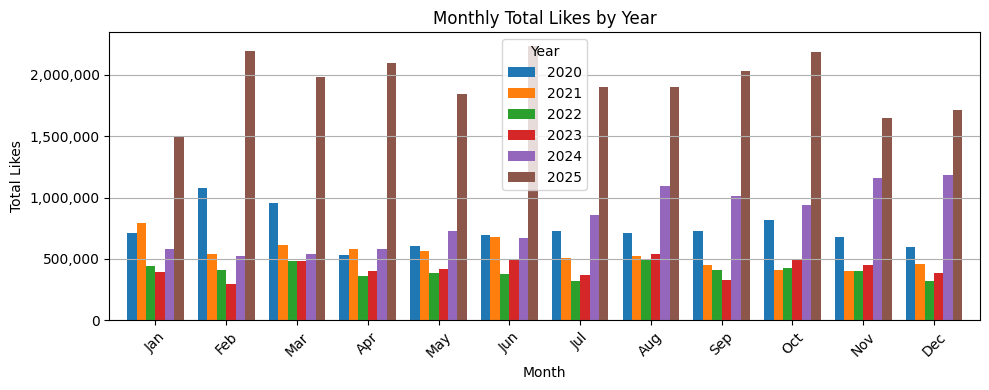

In [108]:
# grouped bar chart
ax = monthly_pivot.plot(kind="bar", figsize=(10, 4), width=0.8)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel("Month")
ax.set_ylabel("Total Likes")
ax.set_title("Monthly Total Likes by Year")
ax.grid(axis="y", alpha=1)
ax.legend(title="Year")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

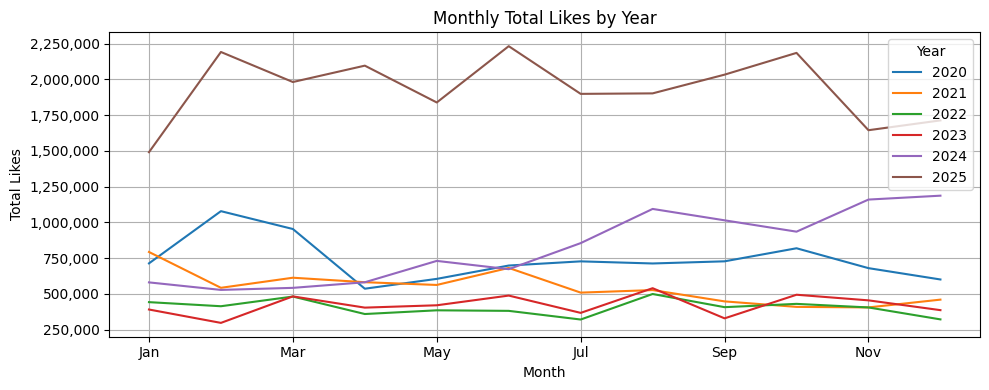

In [109]:
# line graph
ax = monthly_pivot.plot(kind="line", figsize=(10, 4))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel("Month")
ax.set_ylabel("Total Likes")
ax.set_title("Monthly Total Likes by Year")
ax.grid(True, alpha=1)
ax.legend(title="Year")

plt.tight_layout()
plt.show()